# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import confusion_matrix,cohen_kappa_score,classification_report,f1_score,accuracy_score,roc_auc_score,\
roc_curve

In [3]:
plt.rcParams['figure.figsize'] = (15,8)

# 2. Check how many records do we have


In [4]:
df_GermanCredit =  pd.read_excel('GermanCredit.xlsx')
df_GermanCredit.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [5]:
df_GermanCredit.shape

(1000, 3)

In [6]:
df_GermanCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [7]:
df_GermanCredit['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [8]:
df_GermanCredit.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

# 3. Plot Histogram for column 'CreditAmount'

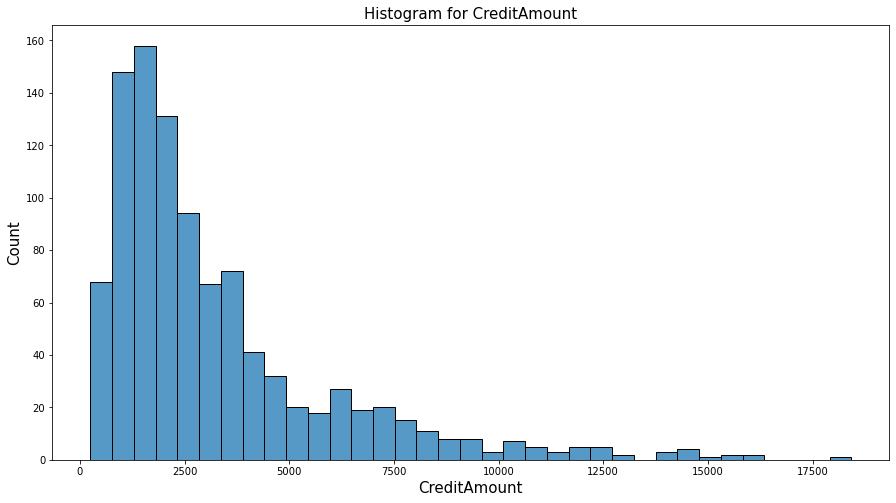

In [9]:
sns.histplot(data=df_GermanCredit,x='CreditAmount')
plt.title("Histogram for CreditAmount",fontsize=15)
plt.xlabel('CreditAmount',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [10]:
# From above graph we can see that data is right skewed
# Most of the CreditAmount is below 5000.

# 3b. Create creditability dataframe

In [11]:
df_creditability = df_GermanCredit[['Creditability']]
df_creditability.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [12]:
amountIntervalsPoints = np.array([0, 500,1000,1500,2000, 2500, 5000, 7500,10000, 15000, 20000])

list1 = [(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i + 1]) for i in np.arange(len(amountIntervalsPoints) - 1)] 

df_interval =  pd.DataFrame(data=list1,columns=['IntervalLeftSide','IntervalRightSide'])

df_interval

,IntervalLeftSide,IntervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [13]:
len(df_GermanCredit[(df_GermanCredit['CreditAmount'] < 500) & (df_GermanCredit['Creditability'] == 1)])

15

In [14]:
Credibility0 = [] 
Credibility1 = [] 

for k in  range(len(df_interval)):
    count0 = 0
    count1 = 0
    for i in range(len(df_GermanCredit)):
        if (df_GermanCredit['CreditAmount'].iloc[i] >= df_interval['IntervalLeftSide'].iloc[k]  and 
            df_GermanCredit['CreditAmount'].iloc[i] < df_interval['IntervalRightSide'].iloc[k]):
                       if df_GermanCredit['Creditability'].iloc[i] == 0:
                             count0 = count0+1   
                       else:
                            count1 = count1+1
    Credibility0.append(count0)          
    Credibility1.append(count1)   
        

In [15]:
print(Credibility0)

[3, 34, 51, 33, 26, 75, 34, 20, 21, 3]


In [16]:
print(Credibility1)

[15, 64, 139, 93, 79, 200, 68, 26, 14, 2]


In [17]:
df_count = pd.DataFrame(data=[Credibility0,Credibility1],index=['Credibility0','Credibility1']).T
df_count

,Credibility0,Credibility1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


In [18]:
df_Credit_data = pd.concat([df_interval,df_count],axis=1)
df_Credit_data

,IntervalLeftSide,IntervalRightSide,Credibility0,Credibility1
0,0,500,3,15
1,501,1000,34,64
2,1001,1500,51,139
3,1501,2000,33,93
4,2001,2500,26,79
5,2501,5000,75,200
6,5001,7500,34,68
7,7501,10000,20,26
8,10001,15000,21,14
9,15001,20000,3,2


In [19]:
df_Credit_data['Total'] = df_Credit_data['Credibility0']+df_Credit_data['Credibility1']
df_Credit_data

,IntervalLeftSide,IntervalRightSide,Credibility0,Credibility1,Total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

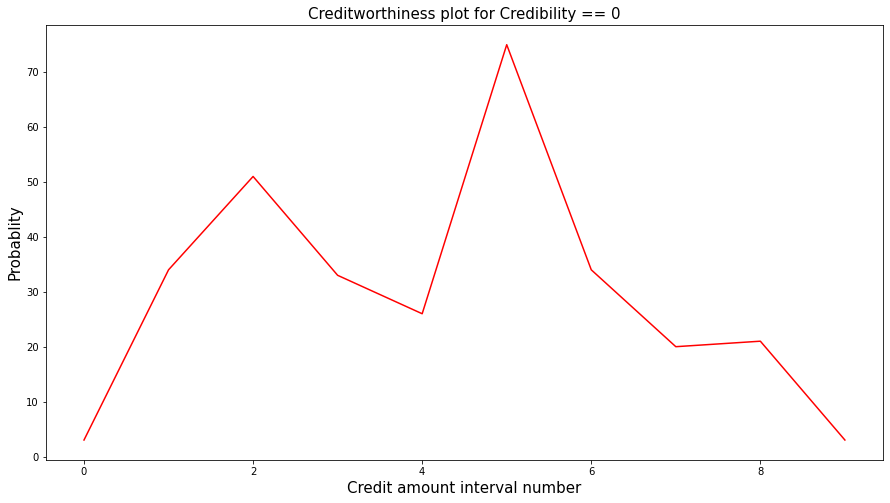

In [20]:
plt.plot(df_Credit_data['Credibility0'],'r')

plt.title("Creditworthiness plot for Credibility == 0",fontsize=15)
plt.xlabel("Credit amount interval number",fontsize=15)
plt.ylabel("Probablity",fontsize=15)
plt.show()

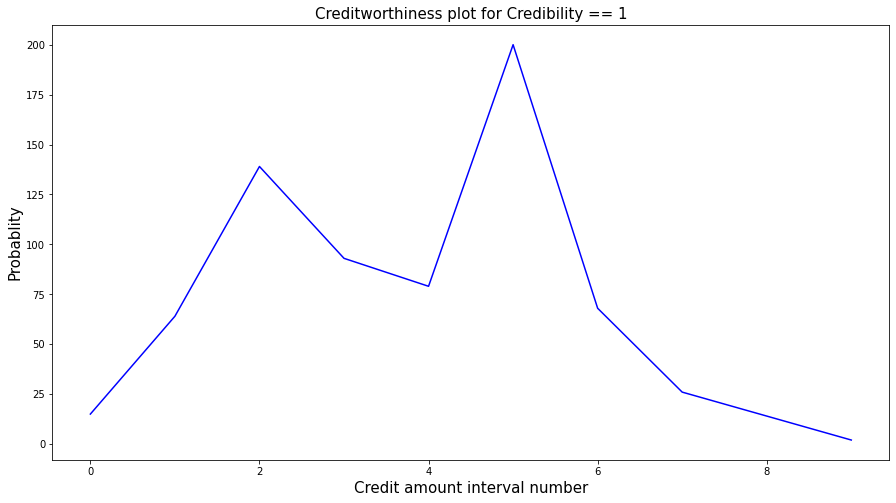

In [21]:
plt.plot(df_Credit_data['Credibility1'],'b')

plt.title("Creditworthiness plot for Credibility == 1",fontsize=15)
plt.xlabel("Credit amount interval number",fontsize=15)
plt.ylabel("Probablity",fontsize=15)
plt.show()

In [22]:
# We can see number of records are more for the credit amount interval number = 6

# 6. Prepare input data for the model

In [23]:
df_feature = df_GermanCredit.drop(['Creditability'],axis=1)
df_target = df_GermanCredit['Creditability']

In [24]:
scale = StandardScaler().fit_transform(df_feature)
df_scaled_feature = pd.DataFrame(scale,columns=df_feature.columns)
df_scaled_feature.head()

,CreditAmount,DurationOfCreditInMonths
0,-0.787657,-0.240857
1,-0.167384,-0.987573
2,-0.861381,-0.738668
3,-0.407341,-0.738668
4,-0.389974,-0.738668


In [25]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled_feature,df_target,test_size=0.3,random_state=10)

print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (700, 2)
y_train :  (700,)
X_test :  (300, 2)
y_test :  (300,)


# 7. Fit logistic regression model

In [26]:
logreg = LogisticRegression()

model_full =  logreg.fit(X_train,y_train)


# 8. Test accuracy calculation

In [27]:
y_pred = model_full.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))

print("Classification Report : ")
print(classification_report(y_test,y_pred))

Accuracy: 0.67
Classification Report : 
              precision    recall  f1-score   support

           0       0.48      0.11      0.18        98
           1       0.69      0.94      0.79       202

    accuracy                           0.67       300
   macro avg       0.58      0.53      0.49       300
weighted avg       0.62      0.67      0.59       300



In [ ]:
# As per above score we can see that we have less precision score but high recall.

# 9. Build a confusion matrix

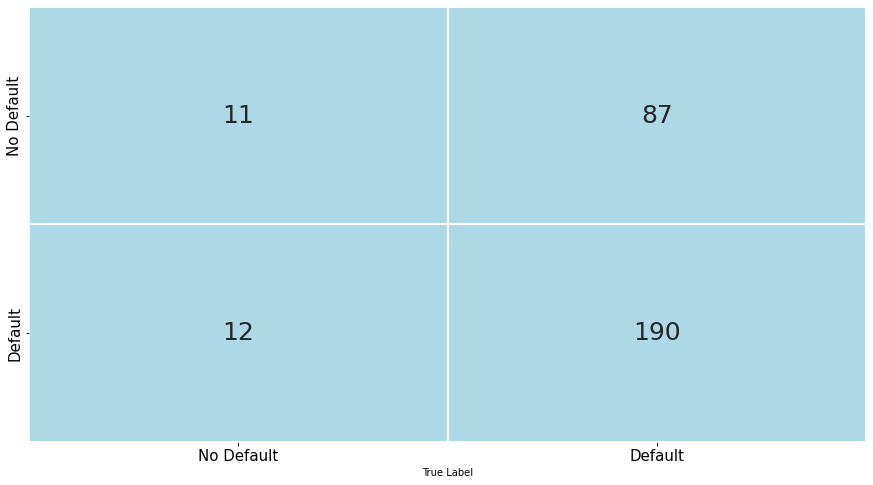

In [28]:
cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(cm,columns=['No Default','Default'],index=['No Default','Default'])

sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False,cmap=ListedColormap(['lightblue']),annot_kws={'size':25},
           linewidths=0.1)
plt.xlabel("True Label")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [29]:
# We can see that we are getting 190 defaulter out of 202 in confusion matrix
# We can also see that our model are not predicting non defaulter as accurate 

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

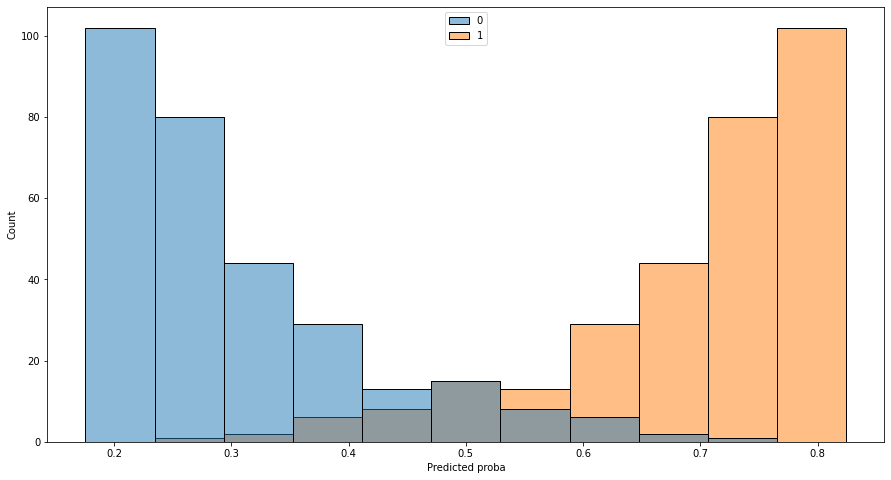

In [34]:
y_pred_prob = model_full.predict_proba(X_test)
sns.histplot(y_pred_prob)
plt.xlabel('Predicted proba')
plt.show()

In [ ]:
# We can see that defaulter has higher probablity as compared to defaulter 